In [3]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [5]:
little_women_url = 'https://www.inferentialthinking.com/chapters/01/3/little_women.txt'
little_women_text = read_url(little_women_url)
chapters = little_women_text.split('CHAPTER ')[1:]

In [6]:
Table().with_column('Text', chapters)

Text
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [7]:
np.char.count(chapters, 'Christmas')

array([8, 9, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [8]:
np.char.count(chapters, 'Jo')

array([44, 21, 62, 34, 55, 13,  9, 71, 21, 12, 42, 60, 24, 48, 26, 13, 29,
       35,  5, 29, 67, 17, 51, 36, 12, 17, 28, 69, 49, 39,  7, 60,  2, 55,
       42, 35,  5, 47, 15, 15, 17, 36, 61,  9,  6, 56, 37])

In [9]:
Table().with_columns(
    'Jo', np.char.count(chapters, 'Jo'),
    'Meg', np.char.count(chapters, 'Meg'),
    'Amy', np.char.count(chapters, 'Amy'),
    'Beth', np.char.count(chapters, 'Beth'),
    'Laurie', np.char.count(chapters, 'Laurie')
)

Jo,Meg,Amy,Beth,Laurie
44,26,23,26,0
21,20,13,12,0
62,36,2,2,16
34,17,14,18,0
55,13,6,14,35
13,5,6,28,9
9,5,27,5,7
71,16,48,9,17
21,71,3,5,24
12,4,5,5,4


<br><br><br><br><br><br><br>

## Visualization

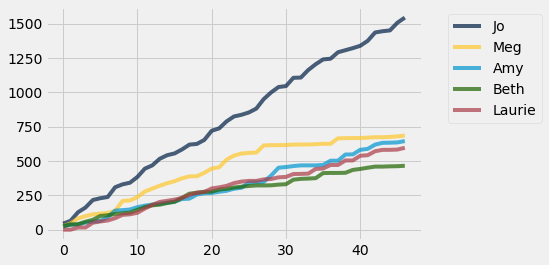

In [10]:
Table().with_columns(
    'Jo', np.char.count(chapters, 'Jo'),
    'Meg', np.char.count(chapters, 'Meg'),
    'Amy', np.char.count(chapters, 'Amy'),
    'Beth', np.char.count(chapters, 'Beth'),
    'Laurie', np.char.count(chapters, 'Laurie')
).cumsum().plot()

<br><br><br><br><br><br><br>

## Visualizing chapter length vs number of periods

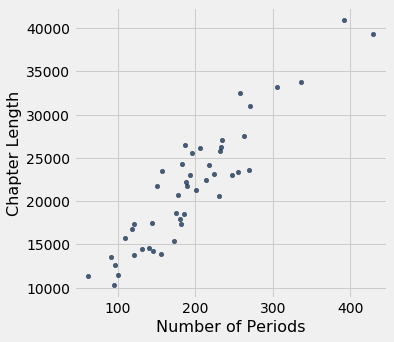

In [11]:
Table().with_columns([
        'Chapter Length', [len(c) for c in chapters],
        'Number of Periods', np.char.count(chapters, '.'),
    ]).scatter('Number of Periods')